# Neural Style Transfer using Pytorch

Understand Neural Style Transfer Practically 

Be able to create artistic style image by applying style transfer using pytorch 

## Task 1 set Colab runtime

In [1]:
!pip install torch torchvision
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Task 2 Load VGG pretrained model

In [2]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
# maintain features part only (remove (classifier))
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
# freeze parameters of vgg model so update of gradients or bias will occur
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [5]:
# move model to GPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 Preprocessing and displaying images
Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [7]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size=500):
  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transforms = T.Compose([
                              T.Resize(size),
                              T.ToTensor(), # (h, w, c) -> (c, h, w)
                              T.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])
  ])

  image = img_transforms(image)

  image = image.unsqueeze(0) #(c, h, w) -> (batch_size, c, h, w)

  return image

In [8]:
content_p = preprocess('/content/Project-NST/content11.jpg')
style_p = preprocess('/content/Project-NST/style11.jpg')

content_p, style_p = content_p.to(device), style_p.to(device)

print(f"content shape: {content_p.shape}")
print(f"style shape: {style_p.shape}")

content shape: torch.Size([1, 3, 259, 345])
style shape: torch.Size([1, 3, 500, 577])


## Task 4 Deprocess image

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to("cpu").clone()
  image = image.numpy()
  image = image.squeeze(0) # from (batch_size, c, h, w) -> (c, h, w)
  image = image.transpose(1, 2, 0) # (h, w, c)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])

  image = image.clip(0,1)

  return image

In [10]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print(f"content shape: {content_d.shape}")
print(f"style shape: {style_d.shape}")

content shape: (259, 345, 3)
style shape: (500, 577, 3)


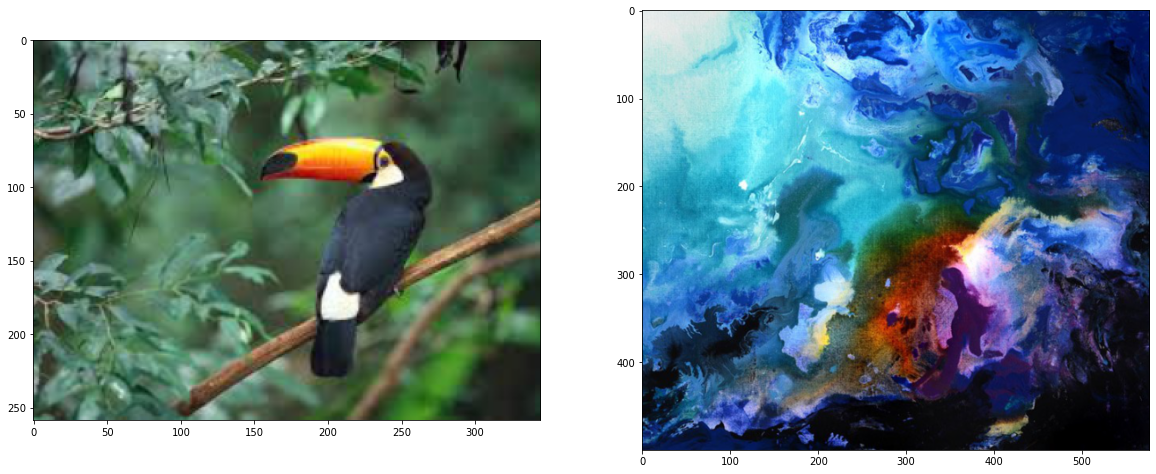

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 Get content, style features and create Gram matrix

In [12]:
def get_features(image, model):
  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10' : 'conv3_1',
      '19' : 'conv4_1',
      '21' : 'conv4_2', # content feature
      '28' : 'conv5_1'
  }

  x = image
  Features = {}

  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      Features[layers[name]] = x

  return Features



In [30]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)


print(f"content feature: {content_f}")
print(f"style feature: {style_f}")

content feature: {'conv1_1': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.3344, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [3.2672, 0.4197, 0.4224,  ..., 0.3278, 0.2849, 0.0000],
          [3.2931, 0.3801, 0.3924,  ..., 0.3182, 0.2849, 0.0000],
          ...,
          [3.3201, 1.3217, 1.5657,  ..., 0.3136, 0.3016, 0.0000],
          [3.0458, 1.8776, 2.0483,  ..., 0.3039, 0.3008, 0.0000],
          [1.4736, 1.1375, 1.4402,  ..., 3.3923, 3.3901, 0.1092]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.

In [14]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size()
  tensor = tensor.view(c, h*w) # unroll
  gram = torch.mm(tensor, tensor.t())
  return gram
  

In [15]:
style_gram = {layer : gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 Create content and style loss functions 

In [16]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss
  

In [17]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [22]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0

  for layer in style_weights:
     target_f = target_features[layer]
     target_gram = gram_matrix(target_f)
     style_gram = style_grams[layer] 
     b, c, h, w = target_f.shape
     layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
     loss += layer_loss/(c*h*w)

  return loss

In [23]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print("content loss: ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("style loss: ", style_loss(style_weights, target_f, style_gram))

content loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style loss:  tensor(2837.5432, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 Training loop

In [24]:
from torch import optim

optimizer = optim.Adam([target], lr=0.003)

alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

In [25]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha*c_loss + beta*s_loss
  return loss

In [28]:
results = []

for i in range(epochs):

  target_f = get_features(target, vgg)

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_gram)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print("total loss at epoch {} : {}".format(i, t_loss))
    results.append(deprocess(target.detach()))

total loss at epoch 0 : 283754336.0
total loss at epoch 500 : 20904192.0
total loss at epoch 1000 : 9374982.0
total loss at epoch 1500 : 7144344.5
total loss at epoch 2000 : 5870318.0
total loss at epoch 2500 : 5045546.0


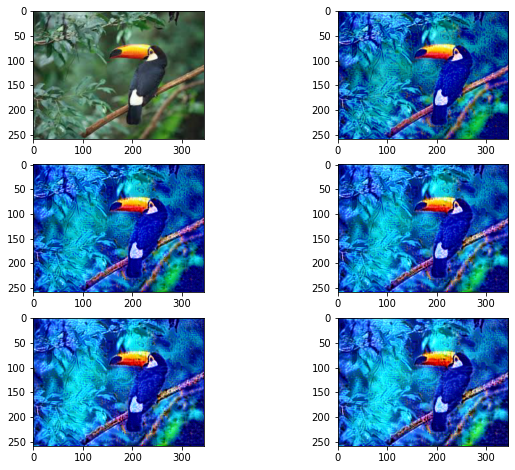

In [31]:
plt.figure(figsize=(10,8))

for i in range(len(results)):
  plt.subplot(3, 2, i+1)
  plt.imshow(results[i])
plt.show()

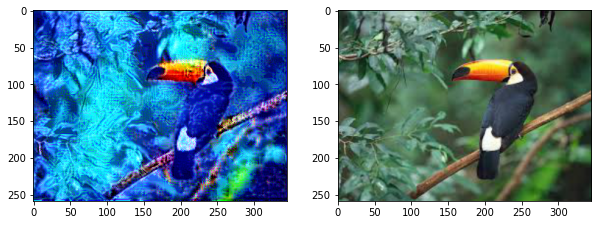

In [32]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(target_copy)
ax2.imshow(content_copy)